# Question 1

In [10]:
P_legit_as_spam = 0.01  # P(Classified as Spam | Legitimate)
P_spam_as_not_spam = 0.05  # P(Classified as Not Spam | Spam)
P_spam = 0.03  # Prevalence of Spam
P_legit = 1 - P_spam

# P(Classified as Spam | Spam) = 1 - P(Classified as Not Spam | Spam)
P_classified_spam_given_spam = 1 - P_spam_as_not_spam

# P(Classified as Spam) = P(Classified as Spam | Spam)*P(Spam) + P(Classified as Spam | Legitimate)*P(Legitimate)
P_classified_spam = P_classified_spam_given_spam * P_spam + P_legit_as_spam * P_legit

# P(Spam | Classified as Spam)
P_spam_given_classified_spam = P_classified_spam_given_spam * P_spam / P_classified_spam
    
P_spam_given_classified_spam

0.7460732984293194

# Question 2

In [11]:
P_true_positive = 0.99  # P(Positive | Pregnant)
P_false_positive = 0.02  # P(Positive | Not Pregnant)
P_pregnant = 0.2  # P(Pregnant)
P_not_pregnant = 1 - P_pregnant

# P(Positive) = P(Positive | Pregnant)*P(Pregnant) + P(Positive | Not Pregnant)*P(Not Pregnant)
P_positive = P_true_positive * P_pregnant + P_false_positive * P_not_pregnant

# P(Pregnant | Positive)
P_pregnant_given_positive = P_true_positive * P_pregnant / P_positive
    
P_pregnant_given_positive

0.9252336448598131

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian Network
bn = gum.BayesNet("PregnancyTest")

# Add nodes
bn.add(gum.LabelizedVariable("Pregnant", "Is the woman pregnant?", 2))  # 0: No, 1: Yes
bn.add(gum.LabelizedVariable("Test", "Result of the test", 2))  # 0: Negative, 1: Positive

# Add arcs
bn.addArc("Pregnant", "Test")

# Set conditional probabilities
bn.cpt("Pregnant").fillWith([0.8, 0.2])  # P(Pregnant)
bn.cpt("Test")[{"Pregnant": 0}] = [0.98, 0.02]  # P(Test | Not Pregnant)
bn.cpt("Test")[{"Pregnant": 1}] = [0.01, 0.99]  # P(Test | Pregnant)

# Run the inference computation
gnb.showInference(bn, evs={"Test": 1})

Graphviz is not installed. 
  Please install this program in order to visualize graphical models in pyAgrum. 
  See https://graphviz.org/download/


FileNotFoundError: [Errno 2] "dot" not found in path.

# Question 3

In [5]:
import pyAgrum as gum

# Create a Bayesian Network named 'Car'
car_bn = gum.BayesNet('Car')

# Add nodes for Battery
battery = car_bn.add(gum.LabelizedVariable('Battery', 'Battery', 2))
car_bn.cpt(battery).fillWith([0.1, 0.9])

# Add nodes for Lights
lights = car_bn.add(gum.LabelizedVariable('Lights', 'Lights', 2))
car_bn.addArc(battery, lights)
car_bn.cpt(lights)[{'Battery': 0}] = [1.0, 0.0]
car_bn.cpt(lights)[{'Battery': 1}] = [0.05, 0.95]

# Add nodes for Gas
gas = car_bn.add(gum.LabelizedVariable('Gas', 'Gas', 2))
car_bn.cpt(gas).fillWith([0.25, 0.75])

# Add nodes for Ignition
ignition = car_bn.add(gum.LabelizedVariable('Ignition', 'Ignition', 2))
car_bn.addArc(battery, ignition)
car_bn.cpt(ignition)[{'Battery': 0}] = [1.0, 0.0]
car_bn.cpt(ignition)[{'Battery': 1}] = [0.1, 0.9]

# Add nodes for Engine Starts
engine_starts = car_bn.add(gum.LabelizedVariable('EngineStarts', 'Engine Starts', 2))
car_bn.addArc(ignition, engine_starts)
car_bn.addArc(gas, engine_starts)
car_bn.cpt(engine_starts)[{'Ignition': 0, 'Gas': 0}] = [1, 0]
car_bn.cpt(engine_starts)[{'Ignition': 0, 'Gas': 1}] = [1, 0]
car_bn.cpt(engine_starts)[{'Ignition': 1, 'Gas': 0}] = [1, 0]
car_bn.cpt(engine_starts)[{'Ignition': 1, 'Gas': 1}] = [0.05, 0.95]

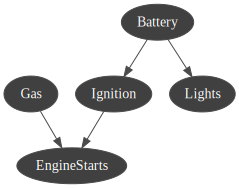

In [6]:
gnb.showBN(car_bn)

In [7]:
gnb.sideBySide(car_bn.cpt(battery), car_bn.cpt(gas), car_bn.cpt(ignition))
gnb.sideBySide(car_bn.cpt(engine_starts), car_bn.cpt(lights))

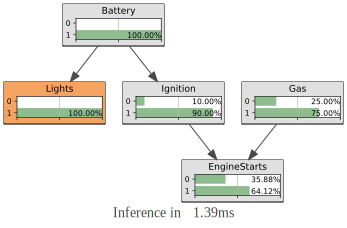

In [9]:
gnb.showInference(car_bn, evs={"Lights": 1})